In [1]:
from utils import *

import shap

# Задание 5: использовать shap, выполнить задание 1 и 2.

## task 1

In [2]:
train = load_data('../data/assignment_2_train_I.csv')
train[:2]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Columns: 457 entries, TransactionID to log_TransactionAmt
dtypes: float64(443), int64(9), object(5)
memory usage: 627.6+ MB


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,addr2_D15_std,card1_card2_D15_mean,card1_card2_D15_std,card1_card2_card3_card5_D15_mean,card1_card2_card3_card5_D15_std,card1_card2_card3_card5_addr1_addr2_D15_mean,card1_card2_card3_card5_addr1_addr2_D15_std,int_TransactionAmt,frac_TransactionAmt,log_TransactionAmt
0,2987000,0,2017-12-02 00:00:00,68.5,0,13926,NaN,150.0,3.0,142.0,...,186.33749,0.500000,0.577350,0.500000,0.577350,0.00,NaN,68,0.5,4.226834
1,2987001,0,2017-12-02 00:00:01,29.0,0,2755,404.0,150.0,1.0,102.0,...,186.33749,114.811765,177.751006,114.811765,177.751006,59.75,123.056897,29,0.0,3.367296


In [3]:
trash_cols = [col for col, val in (train.dtypes == 'object').items() if val]

train.drop(trash_cols, axis=1, inplace=True)
train.shape

(180000, 452)

(144000, 451)
(36000, 451)
(144000,)
(36000,)

0:	learn: 0.6759022	test: 0.6690276	best: 0.6690276 (0)	total: 28.1ms	remaining: 28.1s
100:	learn: 0.8990301	test: 0.8908892	best: 0.8908892 (100)	total: 2.68s	remaining: 23.9s
200:	learn: 0.9165081	test: 0.9058091	best: 0.9058091 (200)	total: 5.13s	remaining: 20.4s
300:	learn: 0.9289293	test: 0.9155331	best: 0.9156150 (297)	total: 7.67s	remaining: 17.8s
400:	learn: 0.9365898	test: 0.9210137	best: 0.9210137 (400)	total: 10.2s	remaining: 15.3s
500:	learn: 0.9429103	test: 0.9248837	best: 0.9248837 (500)	total: 12.7s	remaining: 12.6s
600:	learn: 0.9473662	test: 0.9281660	best: 0.9282221 (599)	total: 15.4s	remaining: 10.2s
700:	learn: 0.9521433	test: 0.9313102	best: 0.9313208 (697)	total: 18.1s	remaining: 7.72s
800:	learn: 0.9567699	test: 0.9345168	best: 0.9345168 (800)	total: 20.6s	remaining: 5.12s
900:	learn: 0.9597835	test: 0.9359818	best: 0.9359818 (900)	total: 23.6s	remaining: 2.6s
999:	learn: 0.9628887	test: 0.9384011	best: 0.9384011 (99

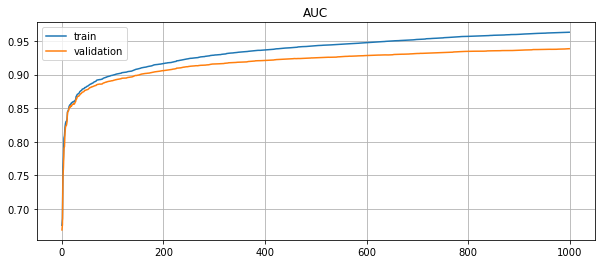

In [4]:
%%time
params = {
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "task_type": "GPU",
    
    "depth": 5,
    "learning_rate": 0.1,
    
    "verbose": 100
}

cb_model1, eval_valid = trainingCatBoost(
    train, 
    target='isFraud',
    params=params,
)

In [5]:
train2000 = train.sample(2000)

Xtrain20001, Xvalid20001, ytrain20001, yvalid20001 = train_test_split(
    train2000.drop('isFraud', axis=1), train2000['isFraud'],
    train_size=0.8, random_state=42, shuffle=True
)

explainer1 = shap.TreeExplainer(cb_model1)
shap_values1 = explainer1.shap_values(Xvalid20001, yvalid20001)

(144000, 182)
(36000, 182)
(144000,)
(36000,)

0:	learn: 0.7382966	test: 0.7369062	best: 0.7369062 (0)	total: 30.6ms	remaining: 30.5s
100:	learn: 0.8869893	test: 0.8786270	best: 0.8786270 (100)	total: 3.93s	remaining: 35s
200:	learn: 0.9038762	test: 0.8926325	best: 0.8926325 (200)	total: 6.61s	remaining: 26.3s
300:	learn: 0.9147487	test: 0.8992021	best: 0.8992105 (298)	total: 9.08s	remaining: 21.1s
400:	learn: 0.9239658	test: 0.9056431	best: 0.9056431 (400)	total: 11.2s	remaining: 16.7s
500:	learn: 0.9310461	test: 0.9107324	best: 0.9107397 (499)	total: 14.2s	remaining: 14.2s
600:	learn: 0.9361335	test: 0.9141925	best: 0.9141925 (600)	total: 16.7s	remaining: 11.1s
700:	learn: 0.9420498	test: 0.9188843	best: 0.9188843 (700)	total: 18.9s	remaining: 8.04s
800:	learn: 0.9465696	test: 0.9223373	best: 0.9223373 (800)	total: 21.3s	remaining: 5.3s
900:	learn: 0.9507156	test: 0.9242484	best: 0.9242697 (891)	total: 23.7s	remaining: 2.6s
999:	learn: 0.9550668	test: 0.9268517	best: 0.9268585 (998)	

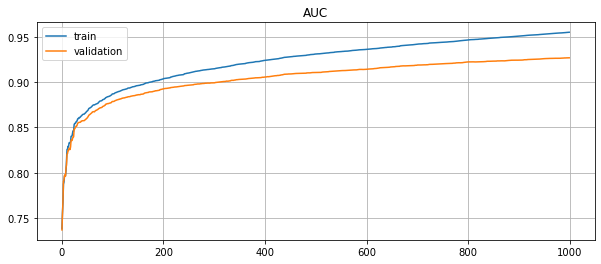

In [6]:
feature_importance_shap = pd.Series(dict(zip(Xvalid20001, shap_values1.mean(axis=0))))
feature_importance_shap = feature_importance_shap[feature_importance_shap > 0]

model_shap, eval_valid = trainingCatBoost(
    train[list(feature_importance_shap.index) + ['isFraud']],
    'isFraud',
    params=params
)

In [7]:
scores = ScoresAUC('roc_auc')
scores.load_csv()
scores.add_score(eval_valid, 'shap')

,roc_auc
base_line,0.9384
above_zero,0.9383
perm_imp,0.9389
perm_imp_zero,0.9363
shap,0.9269
shap_IF,0.9345


## task 2

In [8]:
train = load_data('../data/assignment_2_train_II.csv')
train[:2]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Columns: 365 entries, C13 to isFraud
dtypes: float64(356), int64(9)
memory usage: 501.3 MB


,C13,M4,TransactionID,P_emaildomain,V317,card1,R_emaildomain,M5,C14,card1_card2_card3_card5_addr1_addr2_TransactionAmt_std,...,V119,V93,addr2_D15_std,V249,V252,V179,V114,V110,V117,isFraud
0,1.0,1.0,2987000,NaN,117.0,13926,NaN,0.0,1.0,NaN,...,1.0,0.0,186.33749,NaN,NaN,NaN,1.0,1.0,1.0,0
1,1.0,0.0,2987001,0.0,0.0,2755,NaN,1.0,1.0,270.054718,...,1.0,0.0,186.33749,NaN,NaN,NaN,1.0,1.0,1.0,0


(144000, 364)
(36000, 364)
(144000,)
(36000,)

0:	learn: 0.6866357	test: 0.6781256	best: 0.6781256 (0)	total: 23.6ms	remaining: 23.6s
100:	learn: 0.9012527	test: 0.8929975	best: 0.8929975 (100)	total: 2.49s	remaining: 22.2s
200:	learn: 0.9194062	test: 0.9081109	best: 0.9081109 (200)	total: 4.73s	remaining: 18.8s
300:	learn: 0.9301009	test: 0.9162184	best: 0.9162457 (299)	total: 7.03s	remaining: 16.3s
400:	learn: 0.9383745	test: 0.9215716	best: 0.9215887 (399)	total: 9.44s	remaining: 14.1s
500:	learn: 0.9440209	test: 0.9253802	best: 0.9253802 (500)	total: 11.8s	remaining: 11.7s
600:	learn: 0.9490905	test: 0.9294518	best: 0.9294635 (597)	total: 14.1s	remaining: 9.38s
700:	learn: 0.9534360	test: 0.9322879	best: 0.9323204 (695)	total: 16.5s	remaining: 7.04s
800:	learn: 0.9573333	test: 0.9351208	best: 0.9351208 (800)	total: 18.9s	remaining: 4.7s
900:	learn: 0.9603639	test: 0.9365036	best: 0.9365252 (886)	total: 21.2s	remaining: 2.33s
999:	learn: 0.9636890	test: 0.9382586	best: 0.9382586 (99

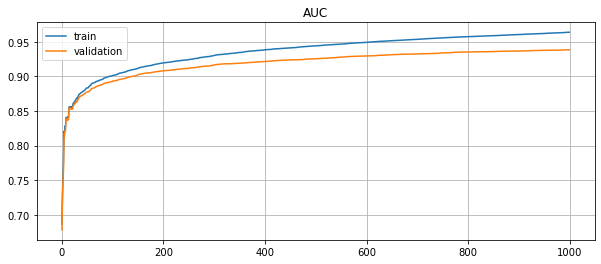

In [9]:
%%time

cb_model2, eval_valid = trainingCatBoost(
    train, 
    target='isFraud',
    params=params,
)

In [10]:
train2000 = train.sample(2000)

Xtrain20002, Xvalid20002, ytrain20002, yvalid20002 = train_test_split(
    train2000.drop('isFraud', axis=1), train2000['isFraud'],
    train_size=0.8, random_state=42, shuffle=True
)

explainer2 = shap.TreeExplainer(cb_model2)
shap_values2 = explainer2.shap_values(Xvalid20002, yvalid20002)

(144000, 166)
(36000, 166)
(144000,)
(36000,)

0:	learn: 0.6970778	test: 0.6902347	best: 0.6902347 (0)	total: 27.3ms	remaining: 27.2s
100:	learn: 0.8983203	test: 0.8840549	best: 0.8840549 (100)	total: 2.22s	remaining: 19.7s
200:	learn: 0.9166895	test: 0.9020760	best: 0.9020760 (200)	total: 4.32s	remaining: 17.2s
300:	learn: 0.9264426	test: 0.9108720	best: 0.9108720 (300)	total: 6.48s	remaining: 15s
400:	learn: 0.9343589	test: 0.9167889	best: 0.9167889 (400)	total: 8.61s	remaining: 12.9s
500:	learn: 0.9399765	test: 0.9202378	best: 0.9202378 (500)	total: 10.8s	remaining: 10.7s
600:	learn: 0.9451602	test: 0.9243854	best: 0.9243917 (598)	total: 12.9s	remaining: 8.53s
700:	learn: 0.9502655	test: 0.9283449	best: 0.9283449 (700)	total: 15s	remaining: 6.4s
800:	learn: 0.9545023	test: 0.9311886	best: 0.9312005 (799)	total: 17.2s	remaining: 4.27s
900:	learn: 0.9576440	test: 0.9338269	best: 0.9338284 (899)	total: 19.3s	remaining: 2.13s
999:	learn: 0.9607679	test: 0.9356900	best: 0.9356900 (999)	t

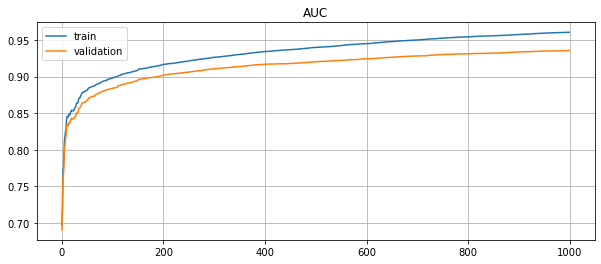

In [11]:
feature_importance_shap = pd.Series(dict(zip(Xvalid20002, shap_values2.mean(axis=0))))
feature_importance_shap = feature_importance_shap[feature_importance_shap > 0]

model_shap_zero, eval_valid = trainingCatBoost(
    train[list(feature_importance_shap.index) + ['isFraud']],
    'isFraud',
    params=params
)

In [12]:
scores.add_score(eval_valid, 'shap_IF')

,roc_auc
base_line,0.9384
above_zero,0.9383
perm_imp,0.9389
perm_imp_zero,0.9363
shap,0.9269
shap_IF,0.9357


In [13]:
scores.save_csv()

## Вывод:
- __shap__ + __feature_importance__ - выдал наихудший результат

# Задание 6: построить shap.summary_plot и shap.decision_plot для небольшой группы примеров (определить размер самостоятельно) и проанализировать влияние признаков на поведение модели.

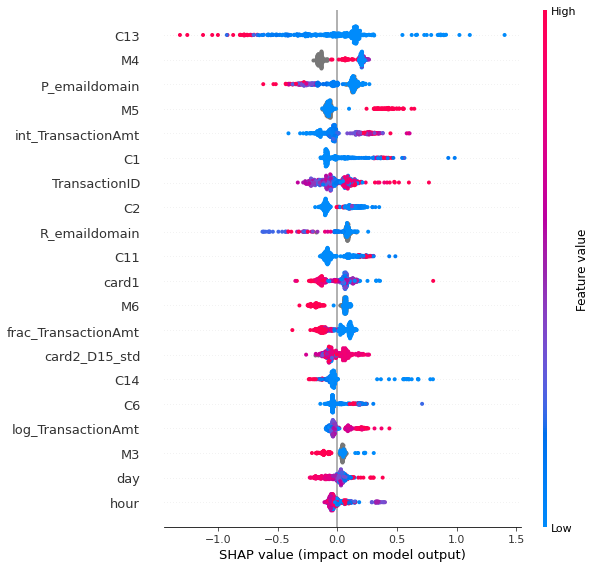

In [14]:
shap.summary_plot(shap_values1, Xvalid20001)

## Вывод:
- __С13__ и __P_emaildomain__ положительно влияют на повышение качества за счет количества наблюдений
- очень много наблюдений __M4__ вообще не влиюят на качество модели
- __M5__ и __C11__ отрицательно влияют на точность модели за счет числа наблюдений

In [15]:
Xtrain, Xvalid, ytrain, yvalid = train_test_split(
    train.drop('isFraud', axis=1), train['isFraud'],
    train_size=0.8, random_state=42, shuffle=True
)

In [16]:
model = cb.CatBoostClassifier(**params)
model.fit(Xtrain, ytrain)

0:	learn: 0.6866357	total: 19.6ms	remaining: 19.5s
100:	learn: 0.9012530	total: 2.17s	remaining: 19.3s
200:	learn: 0.9194065	total: 4.2s	remaining: 16.7s
300:	learn: 0.9301011	total: 6.28s	remaining: 14.6s
400:	learn: 0.9383744	total: 8.3s	remaining: 12.4s
500:	learn: 0.9440208	total: 10.4s	remaining: 10.3s
600:	learn: 0.9490902	total: 12.4s	remaining: 8.22s
700:	learn: 0.9534358	total: 14.5s	remaining: 6.19s
800:	learn: 0.9573330	total: 16.6s	remaining: 4.13s
900:	learn: 0.9603637	total: 18.6s	remaining: 2.05s
999:	learn: 0.9636889	total: 20.7s	remaining: 0us


Explainer expected value: -4.928934557551799


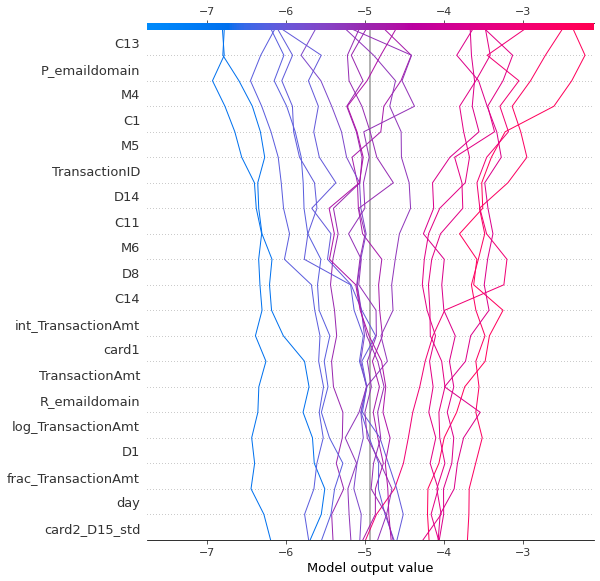

In [17]:
explainer = shap.TreeExplainer(model)
expected_value = explainer1.expected_value
print(f"Explainer expected value: {expected_value}")

select = range(20)
features = Xvalid.iloc[select]
features_display = Xvalid.loc[features.index]
shap_values = explainer.shap_values(features)

shap.decision_plot(expected_value, shap_values, features_display)

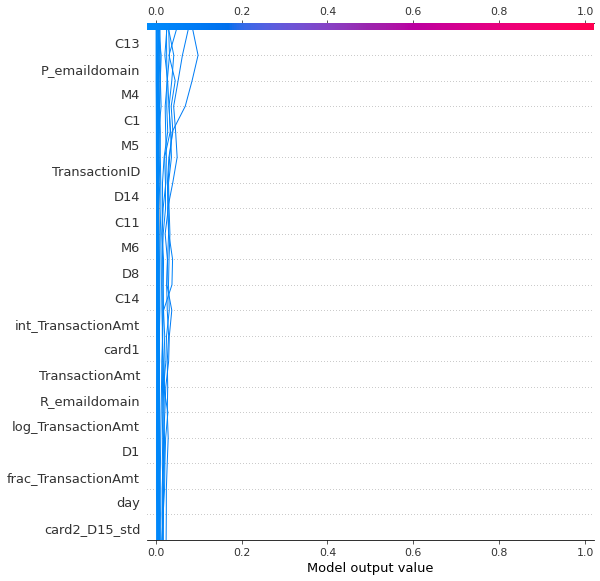

In [18]:
shap.decision_plot(expected_value, shap_values, features_display, link="logit")